# **Differentiation Infrastructure in Deepchem**

Author : Rakshit Kr. Singh : [Website](https://greatrsingh.in/) : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [GitHub](https://github.com/GreatRSingh)

Differentiation Methods like Broyden's Methods is capable of allowing solutions in non-archimedean settings that's why it is widely used in the field of Quantum Chemistry. Additionally, Broyden's method has been successfully applied to accelerate the convergence of nonlinear equations systems in semiconductor device simulations, outperforming other methods in terms of accuracy and iteration steps. **Deepchem** is moving towards leveraging these capabilities to solve complex problems in the field of Quantum Chemistry and Drug Discovery.

## What are Non Linear Equations? and Why do they matter?

Nonlinear equations are mathematical expressions where the relationship between the variables is not linear. Unlike linear equations, which have a constant rate of change, nonlinear equations involve terms with higher powers or functions like exponentials, logarithms, trigonometric functions, etc.

Non-linear equations are essential across various disciplines, including physics, engineering, economics, biology, and finance. They describe complex relationships and phenomena that cannot be adequately modeled with linear equations. From gravitational interactions in celestial bodies to biochemical reactions in living organisms, non-linear equations play a vital role in understanding and predicting real-world systems. Whether it's optimizing structures, analyzing market dynamics, or designing machine learning algorithms, solving non-linear equations is fundamental for advancing scientific knowledge and technological innovation.

### Some Simple Non Linear Equations:

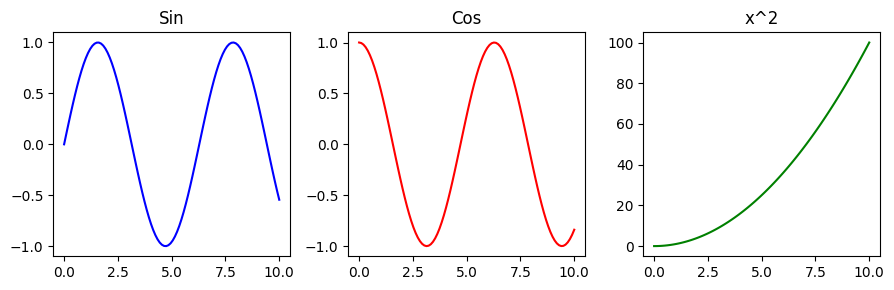

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2

fig, axs = plt.subplots(1, 3, figsize=(9, 3))  

axs[0].plot(x, y1, color='blue')
axs[0].set_title('Sin')

axs[1].plot(x, y2, color='red')
axs[1].set_title('Cos')

axs[2].plot(x, y3, color='green')
axs[2].set_title('x^2')

plt.tight_layout()

plt.show()

## Root Finding Methods

Root finding methods are algorithms used to find the roots, or solutions, of equations, typically nonlinear ones. In mathematical terms, a root of an equation is a value that makes the equation true when substituted into it. These methods are crucial because they allow us to solve a wide range of problems across various fields, including mathematics, physics, engineering, economics, and computer science.

### Broyden's First Method:

Broyden's First Method, is an iterative numerical method used for solving systems of nonlinear equations. It's particularly useful when the Jacobian matrix (the matrix of partial derivatives of the equations) is difficult or expensive to compute. 

Broyden's Method is an extension of the Secant Method for systems of nonlinear equations. It iteratively updates an approximation to the Jacobian matrix using the information from previous iterations. The algorithm converges to the solution by updating the variables in the direction that minimizes the norm of the system of equations.

Steps:
1. Initialize the approximation to the Jacobian matrix.
$$J$$
2. Initialize the variables.
$$X_{k} = f(X_{k})$$
3. Compute the function values.
$$f_{k} = f(X_{k})$$
4. Update the variables.
$$X_{k+1} = X_{k+1} - J_{k}^{-1}f_k$$
5. Compute the change in variables.
$$b = X_{k+1} - X_{k}$$
6. Compute the function values.
$$f_{k+1} = f(X_{k+1})$$
7. Update the approximation to the Jacobian matrix.
$$J_{k+1} = J_{k} + \frac{f_{k+1}b^{T}}{b^{T}b}$$
8. Update the inverse of the Jacobian matrix.
$$J_{k+1}^{-1} = inv(J_{k+1})$$
9. Repeat steps 4-8 until convergence criteria are met.

### References:

[1].. "A class of methods for solving nonlinear simultaneous equations" by Charles G. Broyden

In [2]:
import torch
from deepchem.utils.differentiation_utils import rootfinder
def func1(y, A):
    return torch.tanh(A @ y + 0.1) + y / 2.0
A = torch.tensor([[1.1, 0.4], [0.3, 0.8]]).requires_grad_()
y0 = torch.zeros((2,1))

# Broyden's First Method
yroot = rootfinder(func1, y0, params=(A,), method='broyden1')
print("Root By Broyden's First Method:")
print(yroot)
print("Function Value at Calculated Root:")
print(func1(yroot, A))

# Broyden's Second Method (I will unconmment this part)
# yroot = rootfinder(func1, y0, params=(A,), method='broyden2')
# print("\nRoot by Broyden's Second Method:")
# print(yroot)
# print("Function Value at Calculated Root:")
# print(func1(yroot, A))

Root By Broyden's First Method:
tensor([[-0.0459],
        [-0.0663]], grad_fn=<_RootFinderBackward>)
Function Value at Calculated Root:
tensor([[1.1735e-07],
        [1.7881e-07]], grad_fn=<AddBackward0>)

Root by Broyden's Second Method:
tensor([[-0.0459],
        [-0.0663]], grad_fn=<_RootFinderBackward>)
Function Value at Calculated Root:
tensor([[ 1.0300e-06],
        [-3.2783e-07]], grad_fn=<AddBackward0>)


## Equilibrium Methods (Fixed Point Iteration) | Anderson Acceleration

### The Fixed-Point Problem:
Given the function $f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$, compute a fixed-point $x^{*} \in \mathbb{R}^{n}$ such that
$$x^{*} = f(x^{*})$$

### Classical Approach:
Steps:
1. Initialize the variables.
$x_{k}$
2. Compute the function values.
$f_{k} = f(x_{k})$
3. Update the variables.
$x_{k+1} = f_{k}$
4. Repeat steps 2-3 until convergence criteria are met.

### Anderson Acceleration Approach (Anderson Mixing):
Anderson Acceleration is an iterative method for accelerating the convergence of fixed-point iterations. It combines information from previous iterations to construct a better approximation to the fixed-point. The algorithm uses a history of function values and updates to compute a new iterate that minimizes the residual norm.



Steps:
1. $\textbf{Initialize point: } x_{0}$, fixed-point mapping $f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$

2. $\textbf{for}$ $k = 0, 1,... $ $\textbf{do}$
   - Choose $m_{k}$ (e.g., $m_{k} = min(m, k)$  for some integer $m \geq 0$).
   - Select weights $\alpha_{k}^{j}$ based on the last $m_{k}$ iterations satisfying $\sum_{j=0}^{m_{k}} \alpha_{j}^{k} = 1$.
   - $x_{k+1} = \sum_{j=0}^{m_{k}} \alpha_{j}^{k}f(x_{k-m_{k}+j})$.
3. $\textbf{end}$ $\textbf{for}$

Root by Anderson Acceleration: 1.4142135381698608
Function Value at Calculated Root: 1.4142135381698608


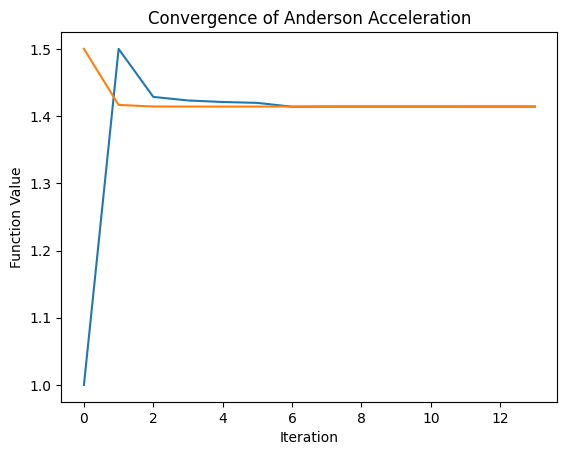

In [11]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.optimize.rootfinder import anderson_acc
x_value, f_value = [], []
def fcn(x, a):
    x_value.append(x.item())
    f_value.append((a/x + x).item()/2)
    return (a/x + x)/2
a = 2.0
x0 = torch.tensor([1.0], requires_grad=True)
x = anderson_acc(fcn, x0, params=[a], maxiter=16)
print("Root by Anderson Acceleration:", x.item())
print("Function Value at Calculated Root:", fcn(x, a).item())

# Plotting the convergence of Anderson Acceleration
plt.plot(x_value)
plt.plot(f_value)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence of Anderson Acceleration')
plt.show()

## Minimizer

Minimization algorithms, including variants of gradient descent like ADAM, are fundamental tools in various fields of science, engineering, and optimization.

They are essential tools for solving optimization problems in diverse fields, ranging from scientific research and engineering to finance and machine learning.

## Gradient Descent

Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function.

Gradient Descent is a fundamental optimization algorithm used to minimize the cost function in various machine learning and optimization problems. It iteratively updates the parameters in the direction of the negative gradient of the cost function.

Steps:

1. $\textbf{Initialize Parameters: }$ Denote the parameter vector to be optimized - $\theta$ and $\theta_0$ represent the initial guess.
    
2. $\textbf{Compute Gradient: }$ Calculate the gradient of the cost function $J(\theta)$ with respect to each parameter.

   $$\nabla J(\theta) = \left[ \frac{\partial J(\theta)}{\partial \theta_1}, \frac{\partial J(\theta)}{\partial \theta_2}, \ldots, \frac{\partial J(\theta)}{\partial \theta_n} \right]^T$$

   - $\textbf{Update Parameters: }$ Adjust the parameters in the opposite direction of the gradient to minimize the cost function according to the learning rate $\alpha$:

   $$\theta = \theta - \alpha \nabla J(\theta)$$
    
   - $\textbf{Repeat: }$ Steps 2 and 3 until the algorithm converges or Stops.

In [15]:
import torch
from deepchem.utils.differentiation_utils.optimize.minimizer import gd
def fcn(x):
    return 2 * x + (x - 2) ** 2, 2 * (x - 2) + 2
x0 = torch.tensor(0.0, requires_grad=True)
x = gd(fcn, x0, [])
print("Minimum by Gradient Descent:", x.item())
print("Function Value at Calculated Minimum:", fcn(x)[0].item())

Minimum by Gradient Descent: 0.9973406791687012
Function Value at Calculated Minimum: (tensor(3.0000), tensor(-0.0053))


## ADAM (Adaptive Moment Estimation)

ADAM is an optimization algorithm used for training deep learning models. It's an extension of the gradient descent optimization algorithm and combines the ideas of both momentum and RMSProp algorithms.

Steps:
1. $\textbf{Initialization: }$ ADAM initializes two moving average variables: $m$ (the first moment, similar to momentum) and $v$ (the second moment, similar to RMSProp).
    
2. $\textbf{Compute Gradients: }$ At each iteration of training, the gradients of the parameters concerning the loss function are computed.

3. $\textbf{Update Moving Averages: }$ The moving averages $m$ and $v$ are updated using exponential decay, with momentum and RMSProp components respectively:

$$m_{t} = \beta_{1} m_{t-1} + (1 - \beta_{1}) \nabla J(\theta_{t})$$
$$v_{t} = \beta_{2} v_{t-1} + (1 - \beta_{2}) (\nabla J(\theta_{t}))^2$$

4. $\textbf{Bias Correction: }$ Due to the initialization of the moving averages to zero vectors, there's a bias towards zero, especially during the initial iterations. To correct this bias, ADAM applies a bias correction step:

$$\hat{m}_{t} = \frac{m_{t}}{1 - \beta_{1}^t}$$
$$\hat{v}_{t} = \frac{v_{t}}{1 - \beta_{2}^t}$$

5. $\textbf{Update Parameters: }$ Finally, the parameters (weights and biases) of the model are updated using the moving averages and the learning rate $\alpha$:

$$\theta_{t+1} = \theta_{t} - \alpha \frac{\hat{m}_{t}}{\sqrt{\hat{v}_{t}} + \epsilon}$$

In [29]:
import torch
from deepchem.utils.differentiation_utils.optimize.minimizer import adam
def fcn(x):
    return 2 * x + (x - 2) ** 2, 2 * (x - 2) + 2
x0 = torch.tensor(10.0, requires_grad=True)
x = adam(fcn, x0, [], maxiter=20000)
print("Minimum by Adam:", x.item())
print("Function Value at Calculated Minimum:", fcn(x)[0].item())

Minimum by Adam: 1.0067708492279053
Function Value at Calculated Minimum: 3.0000457763671875


## Citing This Tutorial

If you found this tutorial useful please consider citing it using the provided BibTeX.

```bibtex
@manual{Quantum Chemistry, 
 title={Differentiation Infrastructure in Deepchem}, 
 organization={DeepChem},
 author={Singh, Rakshit kr.},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Differentiation_Infrastructure_in_Deepchem.ipynb}}, 
 year={2024}, 
} 
```

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/SxSzjRRDMA) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!